In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting graphs and variations
%matplotlib inline
import seaborn as sns #plotting heatmaps and graphs

Reading the csv file

In [2]:
data=pd.read_csv('/kaggle/input/stack-overflow-developer-survey-results-2019/survey_results_public.csv')

Data cleaning

In [3]:
data.shape #checking the shape of the dataset

(88883, 85)

In [4]:
data #knowing my dataset

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
7,8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or mor

In [5]:
data.columns #learning about the columns of my dataset

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

We can see several unwanted columns. We will drop them.

In [6]:
data.drop(columns={'Respondent','Hobbyist','Employment','Student','EdLevel','UndergradMajor','EduOther','OrgSize','DevType','YearsCode','Age1stCode','YearsCodePro','JobSat','MgrIdiot','MgrMoney','MgrWant','JobSeek','LastHireDate','LastInt','FizzBuzz','JobFactors','ResumeUpdate','CurrencySymbol','CurrencyDesc','CompTotal','CompFreq','WorkPlan','WorkChallenge','WorkRemote','ImpSyn','CodeRev','CodeRevHrs','UnitTests','PurchaseHow','PurchaseWhat','MiscTechWorkedWith','MiscTechDesireNextYear','DevEnviron','OpSys','Containers','BlockchainOrg','BlockchainIs','BetterLife','ITperson','OffOn','Extraversion','ScreenName','SOVisit1st','SOVisitFreq','SOVisitTo','SOFindAnswer','SOTimeSaved','SOHowMuchTime','SOAccount','SOPartFreq','SOJobs','EntTeams','SOComm','WelcomeChange','OpenSource','SONewContent','Trans','Sexuality','Ethnicity','Dependents','SurveyLength','SurveyEase'},inplace = True)

In [7]:
data.head(5) #now checking our dataset again

,MainBranch,OpenSourcer,Country,CareerSat,ConvertedComp,WorkWeekHrs,WorkLoc,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,SocialMedia,Age,Gender
0,I am a student who is learning to code,Never,United Kingdom,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Twitter,14.0,Man
1,I am a student who is learning to code,Less than once per year,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,Instagram,19.0,Man
2,"I am not primarily a developer, but I write co...",Never,Thailand,Slightly satisfied,8820.0,40.0,Home,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,NaN,Other(s):,Reddit,28.0,Man
3,I am a developer by profession,Never,United States,Very satisfied,61000.0,80.0,Home,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,Reddit,22.0,Man
4,I am a developer by profession,Once a month or more often,Ukraine,Very dissatisfied,NaN,55.0,Office,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack,Django;Express;Flask;jQuery;React.js;Spring,Flask;jQuery;React.js;Spring,Facebook,30.0,Man


In [8]:
data.shape #we can see that the no. of columns is reduced

(88883, 18)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 18 columns):
MainBranch                88331 non-null object
OpenSourcer               88883 non-null object
Country                   88751 non-null object
CareerSat                 72847 non-null object
ConvertedComp             55823 non-null float64
WorkWeekHrs               64503 non-null float64
WorkLoc                   70055 non-null object
LanguageWorkedWith        87569 non-null object
LanguageDesireNextYear    84088 non-null object
DatabaseWorkedWith        76026 non-null object
DatabaseDesireNextYear    69147 non-null object
PlatformWorkedWith        80714 non-null object
PlatformDesireNextYear    77443 non-null object
WebFrameWorkedWith        65022 non-null object
WebFrameDesireNextYear    62944 non-null object
SocialMedia               84437 non-null object
Age                       79210 non-null float64
Gender                    85406 non-null object
dtypes: float64(3), obje

In [10]:
data.describe()

,ConvertedComp,WorkWeekHrs,Age
count,5.582300e+04,64503.000000,79210.000000
mean,1.271107e+05,42.127197,30.336699
std,2.841523e+05,37.287610,9.178390
min,0.000000e+00,1.000000,1.000000
25%,2.577750e+04,40.000000,24.000000
50%,5.728700e+04,40.000000,29.000000
75%,1.000000e+05,44.750000,35.000000
max,2.000000e+06,4850.000000,99.000000


**Assessing The Data**

Type Conversion

1. MainBranch to Category type
2. OpenSourcer to Category type as 'Yes' or 'No'.
3. CareerSat to category type as this contain only 5 type of string.
4. WorkLoc to Category type as 'Ofice' or 'Home'.
5. Age to Integer type as age is alwees a whole number.
6. Gender to Category type as 'Male' or 'Female'
7. Quantity of incompleteness issue(almost every column contains empty data so we will try to fill them)


NOTE
* MainBranch Will remove all the empty data as Non-Developer.
* Country We don't have other option as to remove the entry row without Country column.
* CareerSat We will take a middle value for empty entry as all satisfied will comment on their satisfaction.
* WorkWeekHrs to not disturb the observation we will replace the empty entry with mean of that column.
* Gender we will take the empty entry as Transgender as they sometimes do not state their Gender.
* Cleaning The Data.
* So now we know the datatypes of the columns and hence now we will be converting them to their required data tyes.

In [11]:
data['MainBranch'].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

In [12]:
MainBranch = []
for i in data['MainBranch']:
    if i == 'I am a developer by profession':
        MainBranch.append('Developer')
    elif i == 'I am a student who is learning to code':
        MainBranch.append('Student')
    elif i == 'I am not primarily a developer, but I write code sometimes as part of my work':
        MainBranch.append('Partial Developer')
    elif i == 'I code primarily as a hobby':
        MainBranch.append('Hobby') 
    elif i == 'I used to be a developer by profession, but no longer am':
        MainBranch.append('Ex Developer')
    else:
        MainBranch.append('Student')
data['MainBranch'] = MainBranch
data['MainBranch'] = data['MainBranch'].astype('category',inplace=True)


In [13]:
data['OpenSourcer'].value_counts()

Never                                                 32295
Less than once per year                               24972
Less than once a month but more than once per year    20561
Once a month or more often                            11055
Name: OpenSourcer, dtype: int64

In [14]:
OpenSourcer = []
for i in data['OpenSourcer']:
    if (i == 'Never' ) or (i=='Less than once per year') or (i==''):
        OpenSourcer.append('No')
    else:
        OpenSourcer.append('Yes')
data['OpenSourcer'] = OpenSourcer
data['OpenSourcer'] = data['OpenSourcer'].astype('category')

In [15]:
data['CareerSat'].value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

In [16]:
data['WorkLoc'].value_counts()

Office                                            40592
Home                                              23278
Other place, such as a coworking space or cafe     6185
Name: WorkLoc, dtype: int64

In [17]:
WorkLoc = []
for i in data['WorkLoc']:
    if i == 'Office':
        WorkLoc.append(i)
    else:
        WorkLoc.append('Home')
data['WorkLoc'] = WorkLoc
data['WorkLoc'] = data['WorkLoc'].astype('category')

In [18]:
data['Age'].value_counts()

25.0    4669
24.0    4428
27.0    4418
26.0    4397
28.0    4387
        ... 
57.9       1
26.3       1
13.5       1
30.8       1
97.0       1
Name: Age, Length: 126, dtype: int64

In [19]:
Age = []
count = 0
for i in data['Age']:
    try:
        Age.append(int(i))
    except:
        Age.append(i)
        count += 1
data['Age'] = Age

In [20]:
count

9673

In [21]:
data['Gender'].value_counts()

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [22]:
Gender = []
for i in data['Gender']:
    if (i=='Man') or (i== 'Man;Non-binary, genderqueer, or gender non-conforming'):
        Gender.append('Male')
    elif (i=='Woman') or (i=='Woman;Non-binary, genderqueer, or gender non-conforming') or (i=='Woman;Man;Non-binary, genderqueer, or gender non-conforming'):
        Gender.append('Female')
    else:
        Gender.append('Transgender')
data['Gender'] = Gender
data['Gender'] = data['Gender'].astype('category')

**QUESTION : Which are the top most countries having the most developed software industry?**

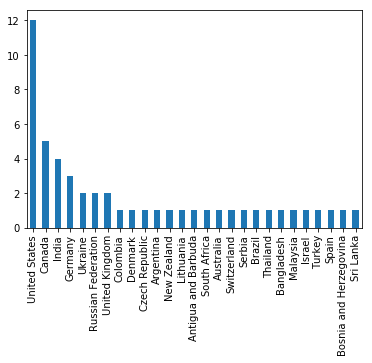

In [23]:
data['Country'].head(50).value_counts().plot(kind='bar')

**Analysis for India**

In [25]:
data_india=data[data['Country']=='India']
data_india_age=data_india[data_india['Age']>25]

**AGE Vs MAINBRANCH**

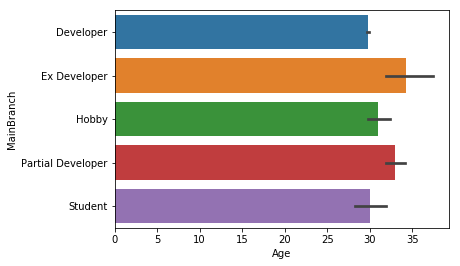

In [26]:
sns.barplot(x='Age',y='MainBranch',data=data_india_age)

**Developers love to work with which databases?**

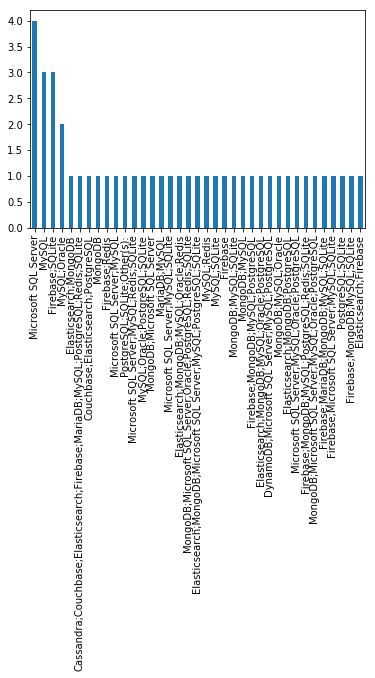

In [27]:
data_india_age['DatabaseWorkedWith'].head(50).value_counts().plot(kind='bar')

**What will be the databases that developers will be working with in the upcoming years?**

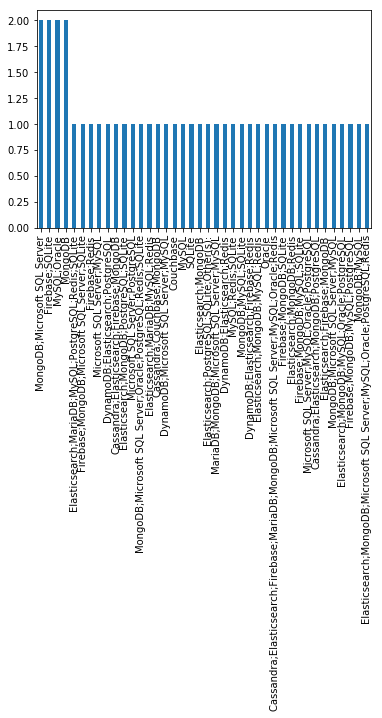

In [28]:
data_india_age['DatabaseDesireNextYear'].head(50).value_counts().plot(kind='bar')

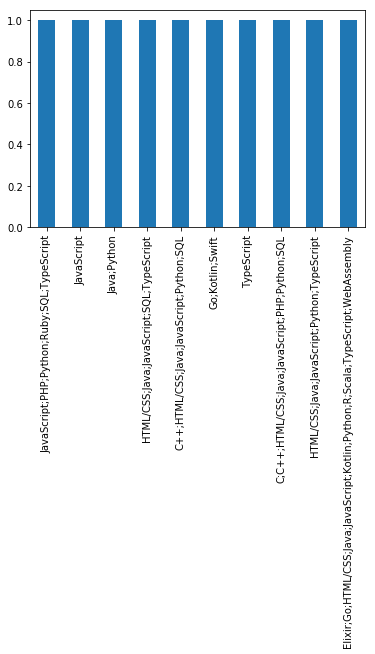

In [29]:
data_india_age['LanguageDesireNextYear'].head(10).value_counts().plot(kind='bar')

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


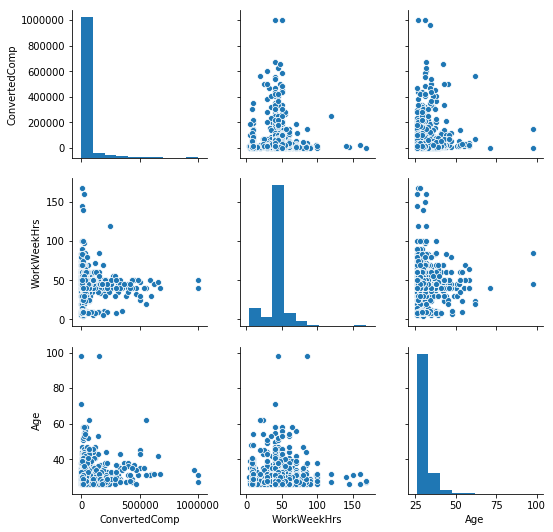

In [30]:
sns.pairplot(data_india_age)

****What is the platform preferred by the developers in india?****

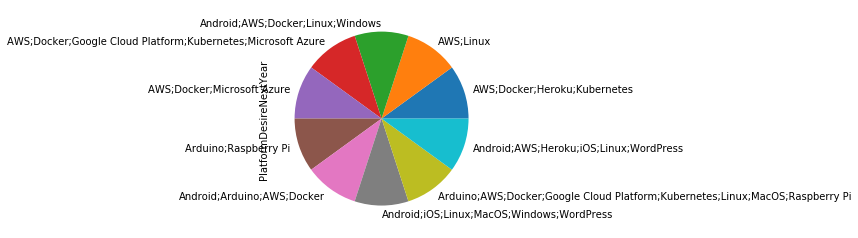

In [31]:
data_india_age['PlatformDesireNextYear'].head(10).value_counts().plot(kind='pie')

**What will be the preferred webframe in the upcoming years in India?**

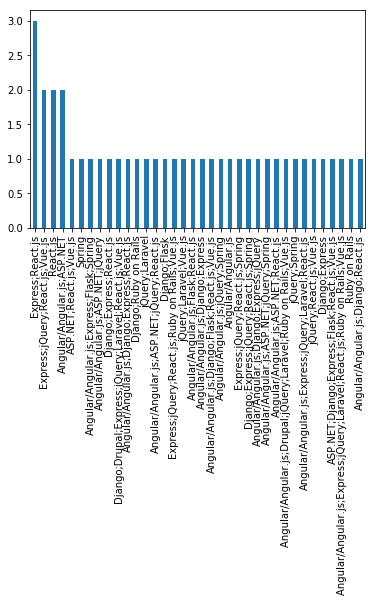

In [32]:
data_india_age['WebFrameDesireNextYear'].head(50).value_counts().plot(kind='bar')

**What are the social medias used by the developers of india?**

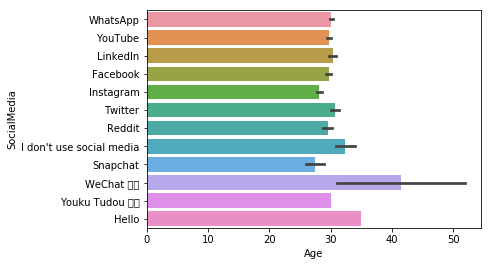

In [33]:
sns.barplot(x='Age',y='SocialMedia',data=data_india_age)

**Question :How many Developers are writing code for opensource?
**

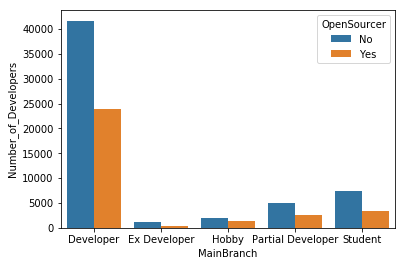

In [34]:
x = data.groupby('MainBranch')['OpenSourcer'].value_counts()
x = x.to_frame('Number_of_Developers')
x = x.reset_index()
sns.barplot(x='MainBranch',y='Number_of_Developers',hue='OpenSourcer',data=x)

**Question :How much money do the Developers get throughout the globe?
**

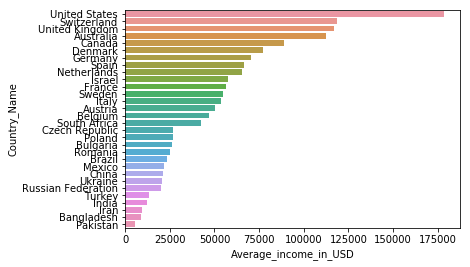

In [35]:
y = data['Country'].value_counts()[:30]
total = data.groupby('Country')['ConvertedComp'].sum()
data_plot1 = (total/y).sort_values(ascending=False)[:30]
data_plot = data_plot1.reset_index()
data_plot.rename(columns={0:'Average_income_in_USD','index':'Country_Name'},inplace=True)
sns.barplot(y='Country_Name',x='Average_income_in_USD',data = data_plot)

**Question :How much are the Developers satisfied with their jobs throughout the globe?
**

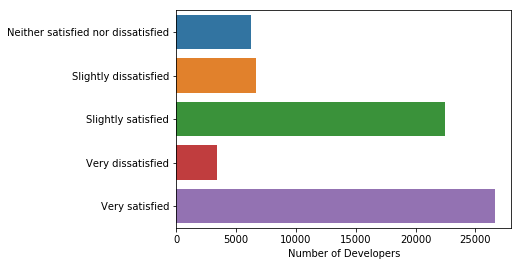

In [36]:
data_dev = data[data['MainBranch']=='Developer']
plot_data=data_dev['CareerSat'].value_counts().sort_index().reset_index()
plot_data.rename(columns={'index':'','CareerSat':'Number of Developers'},inplace=True)
sns.barplot(y='',x='Number of Developers',data=plot_data)

**Question :Which type of work location is preferred by the Developers?
**

([<matplotlib.patches.Wedge at 0x7ffadc6d7748>,
 [Text(-0.1994876782513622, 1.0817599854985769, 'Office'),
  Text(0.1994876782513623, -1.0817599854985769, 'Home')],
 [Text(-0.10881146086437937, 0.5900509011810419, '55.805%'),
  Text(0.10881146086437941, -0.5900509011810419, '44.195%')])

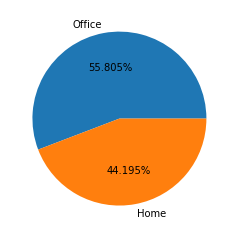

In [37]:
data_plot_number = data_dev['WorkLoc'].value_counts().values
data_plot_name = data_dev['WorkLoc'].value_counts().index 
plt.pie(data_plot_number,labels=data_plot_name,autopct='%1.3f%%',)

**overall analysis of developers who are above 25 years of age**

In [38]:
d=data[data['Age'] >25]

**AGE Vs MAINBRANCH**

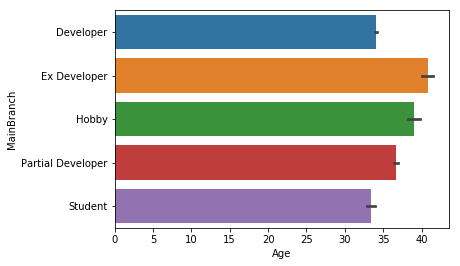

In [39]:
sns.barplot(x='Age',y='MainBranch',data=d)


**Preferred database worked with by the developers all over the world**

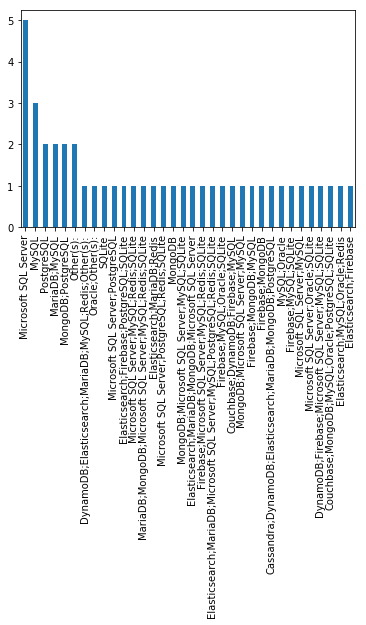

In [40]:
d['DatabaseWorkedWith'].head(50).value_counts().plot(kind='bar')


**What will the preferred language by the developers in the upcoming years?**

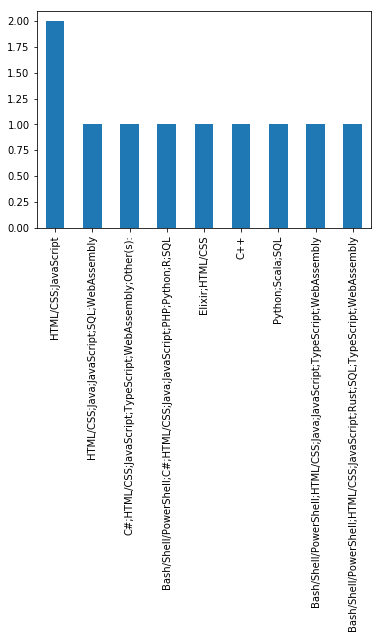

In [41]:
d['LanguageDesireNextYear'].head(10).value_counts().plot(kind='bar')


**What will be the preferred database in the upcoming years?**

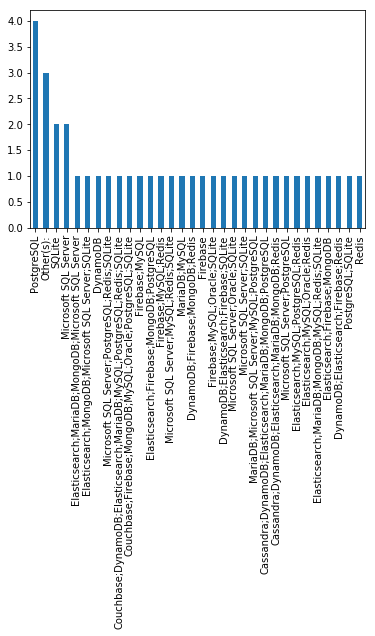

In [42]:
d['DatabaseDesireNextYear'].head(50).value_counts().plot(kind='bar')

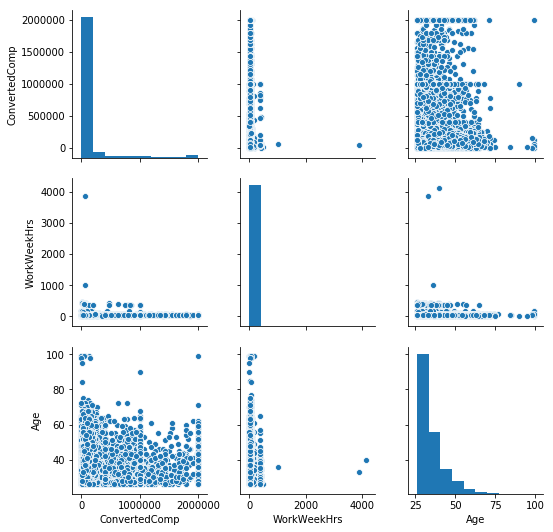

In [43]:
sns.pairplot(d)

In [ ]:
By Sharika Anjum Mondal